In [1]:
p <- c("reshape2","ggplot2","pheatmap","combinat","randomForest", "gridExtra",
       "vegan", "biomformat", "doMC", "cowplot", "pROC", "UpSetR")
usePackage <- function(p) {
  if (!is.element(p, installed.packages()[,1]))
    install.packages(p, dep=TRUE, repos="https://cloud.r-project.org/")
  suppressWarnings(suppressMessages(invisible(require(p, character.only=TRUE))))
}
invisible(lapply(p, usePackage))

In [2]:
outpath<-getwd()

In [3]:
f<-read.table("feature_imps_all.xls", sep="\t", header=TRUE)

In [4]:
head(f)

feature                                                                                             
1 AACATAGGGGGCAAGCGTTGTCCGGAATCACTGGGCGTAAAGGGCGCGCAGGCGGTCTGTTAAGTCAGATGTGAAAGGTTAGGGCTCAACCCTGAACGTG
2 AACATAGGGGGCAAGCGTTGTCCGGAATCACTGGGCGTAAAGGGCGCGTAGGCGGTCTGTTAAGTCGGATGTGAAATGTAAGGGCTCAACCCTTAACGTG
3 AACATAGGGGGCAAGCGTTGTCCGGAATCACTGGGCGTAAAGGGCGCGTAGGTGGTCTGTTAAGTCAGATGTGAAATGTAAGGGCTCAACCCTTAACGTG
4 AACATAGGGGGCAAGCGTTGTCCGGAATCACTGGGCGTAAAGGGCGCGTAGGTGGTTTGTTAAGTCAGATGTGAAATGTAGGGGCTCAACCCCTAACGTG
5 AACGTAGGGTGCAAGCGTTGTCCGGAATTACTGGGTGTAAAGGGAGCGCAGGCGGACCGGCAAGTTGGAAGTGAAAACCACGGGCTCAACCCGTGAATTG
6 AACGTAGGGTGCAAGCGTTGTCCGGAATTACTGGGTGTAAAGGGAGCGCAGGCGGACCGGCAAGTTGGAAGTGAAAACCATAGGCTCAACCTATGGATTG
  AGP_female   AGP_male      cantonese_female cantonese_male
1  0.004527079  2.658972e-03 -0.0005075407              NA  
2 -0.001090662  3.126795e-03  0.0006589286     0.000000000  
3 -0.001775111  3.204646e-04 -0.0105529977     0.021654470  
4 -0.002258264 -3.136297e-03 -0.0023574623    -0.003044743  
5  0.027347287 -4.393136e-05  0.0202816668     0.011620103  
6  0.017894740 -3.935029e-04 -0.0077286584    -0.034111017  
  Taxon                                                                                              
1 k__Bacteria; p__Firmicutes; c__Clostridia; o__Clostridiales; f__Peptococcaceae; g__Peptococcus; s__
2 k__Bacteria; p__Firmicutes; c__Clostridia; o__Clostridiales; f__Peptococcaceae; g__Peptococcus; s__
3 k__Bacteria; p__Firmicutes; c__Clostridia; o__Clostridiales; f__Peptococcaceae; g__Peptococcus; s__
4 k__Bacteria; p__Firmicutes; c__Clostridia; o__Clostridiales; f__Peptococcaceae; g__Peptococcus; s__
5 k__Bacteria; p__Firmicutes; c__Clostridia; o__Clostridiales; f__Ruminococcaceae                    
6 k__Bacteria; p__Firmicutes; c__Clostridia; o__Clostridiales; f__Ruminococcaceae                    
  Confidence
1 0.9999978 
2 0.9999999 
3 0.9999997 
4 0.9999956 
5 0.9999966 
6 0.9999977

In [5]:
rbind.na<-function(l){
    max_len<-max(unlist(lapply(l, length)))
    c_l<-lapply(l, function(x) {c(x, rep(NA, max_len - length(x)))})
    do.call(rbind, c_l)
}


In [6]:
taxa_df <- rbind.na(strsplit(as.character(f$Taxon), ';'))
colnames(taxa_df) <- c("kingdom", "phylum","class","order","family","genus","species")
head(taxa_df)

kingdom     phylum         class          order            
[1,] k__Bacteria  p__Firmicutes  c__Clostridia  o__Clostridiales
[2,] k__Bacteria  p__Firmicutes  c__Clostridia  o__Clostridiales
[3,] k__Bacteria  p__Firmicutes  c__Clostridia  o__Clostridiales
[4,] k__Bacteria  p__Firmicutes  c__Clostridia  o__Clostridiales
[5,] k__Bacteria  p__Firmicutes  c__Clostridia  o__Clostridiales
[6,] k__Bacteria  p__Firmicutes  c__Clostridia  o__Clostridiales
     family              genus           species
[1,]  f__Peptococcaceae   g__Peptococcus  s__   
[2,]  f__Peptococcaceae   g__Peptococcus  s__   
[3,]  f__Peptococcaceae   g__Peptococcus  s__   
[4,]  f__Peptococcaceae   g__Peptococcus  s__   
[5,]  f__Ruminococcaceae NA              NA     
[6,]  f__Ruminococcaceae NA              NA

In [7]:
expand_Taxon<-function(df, Taxon){
    taxa_df <- rbind.na(strsplit(as.character(df[, Taxon]), ';'))
    colnames(taxa_df) <- c("kingdom", "phylum","class","order","family","genus","species")
    data.frame(df, taxa_df)
}

f_ann<-expand_Taxon(f, "Taxon")


In [8]:
dim(f_ann)

[1] 2252   14

In [9]:
## test rank
rank(-c(1, 2, 34, -1, NA), , na.last = "keep")
rank(c(1, 2, 34, -1, NA), , na.last = "keep")

[1]  3  2  1  4 NA

[1]  2  3  4  1 NA

In [10]:
library("dplyr")
f_ann_m<-melt(f_ann, id.vars = c("feature", "Taxon", "kingdom", "phylum", "class", "order", "family", "genus", "species", "Confidence"),
              variable.name = "Dataset", value.name = "imp")
f_ann_m<- f_ann_m %>% dplyr::group_by(Dataset) %>% mutate(imp_rank=rank(-imp, na.last = "keep"))
dim(f_ann_m)
head(f_ann_m)


Attaching package: ‘dplyr’

The following object is masked from ‘package:gridExtra’:

    combine

The following object is masked from ‘package:randomForest’:

    combine

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



[1] 9008   13

feature                                                                                             
1 AACATAGGGGGCAAGCGTTGTCCGGAATCACTGGGCGTAAAGGGCGCGCAGGCGGTCTGTTAAGTCAGATGTGAAAGGTTAGGGCTCAACCCTGAACGTG
2 AACATAGGGGGCAAGCGTTGTCCGGAATCACTGGGCGTAAAGGGCGCGTAGGCGGTCTGTTAAGTCGGATGTGAAATGTAAGGGCTCAACCCTTAACGTG
3 AACATAGGGGGCAAGCGTTGTCCGGAATCACTGGGCGTAAAGGGCGCGTAGGTGGTCTGTTAAGTCAGATGTGAAATGTAAGGGCTCAACCCTTAACGTG
4 AACATAGGGGGCAAGCGTTGTCCGGAATCACTGGGCGTAAAGGGCGCGTAGGTGGTTTGTTAAGTCAGATGTGAAATGTAGGGGCTCAACCCCTAACGTG
5 AACGTAGGGTGCAAGCGTTGTCCGGAATTACTGGGTGTAAAGGGAGCGCAGGCGGACCGGCAAGTTGGAAGTGAAAACCACGGGCTCAACCCGTGAATTG
6 AACGTAGGGTGCAAGCGTTGTCCGGAATTACTGGGTGTAAAGGGAGCGCAGGCGGACCGGCAAGTTGGAAGTGAAAACCATAGGCTCAACCTATGGATTG
  Taxon                                                                                              
1 k__Bacteria; p__Firmicutes; c__Clostridia; o__Clostridiales; f__Peptococcaceae; g__Peptococcus; s__
2 k__Bacteria; p__Firmicutes; c__Clostridia; o__Clostridiales; f__Peptococcaceae; g__Peptococcus; s__
3 k__Bacteria; p__Firmicutes; c__Clostridia; o__Clostridiales; f__Peptococcaceae; g__Peptococcus; s__
4 k__Bacteria; p__Firmicutes; c__Clostridia; o__Clostridiales; f__Peptococcaceae; g__Peptococcus; s__
5 k__Bacteria; p__Firmicutes; c__Clostridia; o__Clostridiales; f__Ruminococcaceae                    
6 k__Bacteria; p__Firmicutes; c__Clostridia; o__Clostridiales; f__Ruminococcaceae                    
  kingdom     phylum         class          order            
1 k__Bacteria  p__Firmicutes  c__Clostridia  o__Clostridiales
2 k__Bacteria  p__Firmicutes  c__Clostridia  o__Clostridiales
3 k__Bacteria  p__Firmicutes  c__Clostridia  o__Clostridiales
4 k__Bacteria  p__Firmicutes  c__Clostridia  o__Clostridiales
5 k__Bacteria  p__Firmicutes  c__Clostridia  o__Clostridiales
6 k__Bacteria  p__Firmicutes  c__Clostridia  o__Clostridiales
  family              genus           species Confidence Dataset   
1  f__Peptococcaceae   g__Peptococcus  s__    0.9999978  AGP_female
2  f__Peptococcaceae   g__Peptococcus  s__    0.9999999  AGP_female
3  f__Peptococcaceae   g__Peptococcus  s__    0.9999997  AGP_female
4  f__Peptococcaceae   g__Peptococcus  s__    0.9999956  AGP_female
5  f__Ruminococcaceae NA              NA      0.9999966  AGP_female
6  f__Ruminococcaceae NA              NA      0.9999977  AGP_female
  imp          imp_rank
1  0.004527079  740    
2 -0.001090662 1698    
3 -0.001775111 1785    
4 -0.002258264 1836    
5  0.027347287  330    
6  0.017894740  426

In [11]:
#detach("package:plyr", unload=TRUE)
# f_ann_m[c(1:5, 9001:9005), ] %>% arrange(imp, Dataset)%>% group_by(Dataset) %>% mutate(imp_rank=rank(-imp, na.last = "keep"))

In [12]:
sum(f_ann_m$imp_rank==1, na.rm = T)

[1] 4

In [13]:
ggplot(f_ann_m, aes(x=imp, y=imp_rank))+geom_point()+facet_wrap(~Dataset)

Warning message:
“Removed 862 rows containing missing values (geom_point).”

### to order the Taxon (or genus) by sum of importance scores within the Taxonomy

In [14]:
f_ann_m$Taxon<-factor(f_ann_m$Taxon)

In [15]:
f_ann_m$genus<-factor(f_ann_m$genus)

In [16]:
dim(f_ann_m)

[1] 9008   13

### -- Imp socre visualization collapsed to sOTUs' Taxonomy

In [17]:
library(dplyr)
Taxon_df<- f_ann_m %>% 
  dplyr::group_by(Taxon, Dataset) %>% 
  dplyr::summarise(n=length(imp), n_NA=sum(is.na(imp)), n_neg=sum(imp<0, na.rm = T), n_pos=sum(imp>0, na.rm = T), 
                   imp_sum = sum(imp, na.rm = T), imp_mean=mean(imp, na.rm = T), 
                   imp_rank_sum= sum(imp_rank, na.rm = T), imp_rank_mean=mean(imp_rank, na.rm = T),
                   imp_rank_min= min(imp_rank, na.rm = T))
cat("# of sum values: ", dim(Taxon_df)[1], '\n')
cat("# of Taxa: ", length(levels(f_ann_m$Taxon)))
Taxon_asc_levels<-levels(f_ann_m$Taxon)[with(Taxon_df,  order(imp_sum))]
Taxon_desc_levels<-levels(f_ann_m$Taxon)[with(Taxon_df,  order(-imp_sum))]

Warning message in min(imp_rank, na.rm = T):
“no non-missing arguments to min; returning Inf”Warning message in min(imp_rank, na.rm = T):
“no non-missing arguments to min; returning Inf”Warning message in min(imp_rank, na.rm = T):
“no non-missing arguments to min; returning Inf”Warning message in min(imp_rank, na.rm = T):
“no non-missing arguments to min; returning Inf”Warning message in min(imp_rank, na.rm = T):
“no non-missing arguments to min; returning Inf”Warning message in min(imp_rank, na.rm = T):
“no non-missing arguments to min; returning Inf”Warning message in min(imp_rank, na.rm = T):
“no non-missing arguments to min; returning Inf”Warning message in min(imp_rank, na.rm = T):
“no non-missing arguments to min; returning Inf”Warning message in min(imp_rank, na.rm = T):
“no non-missing arguments to min; returning Inf”Warning message in min(imp_rank, na.rm = T):
“no non-missing arguments to min; returning Inf”Warning message in min(imp_rank, na.rm = T):
“no non-missing arguments

“no non-missing arguments to min; returning Inf”Warning message in min(imp_rank, na.rm = T):
“no non-missing arguments to min; returning Inf”Warning message in min(imp_rank, na.rm = T):
“no non-missing arguments to min; returning Inf”Warning message in min(imp_rank, na.rm = T):
“no non-missing arguments to min; returning Inf”Warning message in min(imp_rank, na.rm = T):
“no non-missing arguments to min; returning Inf”Warning message in min(imp_rank, na.rm = T):
“no non-missing arguments to min; returning Inf”Warning message in min(imp_rank, na.rm = T):
“no non-missing arguments to min; returning Inf”Warning message in min(imp_rank, na.rm = T):
“no non-missing arguments to min; returning Inf”Warning message in min(imp_rank, na.rm = T):
“no non-missing arguments to min; returning Inf”Warning message in min(imp_rank, na.rm = T):
“no non-missing arguments to min; returning Inf”Warning message in min(imp_rank, na.rm = T):
“no non-missing arguments to min; returning Inf”Warning message in min

# of sum values:  1656 
# of Taxa:  414

In [18]:
head(Taxon_df)

Taxon                                                                                                                      
1 k__Archaea; p__Euryarchaeota; c__Methanobacteria; o__Methanobacteriales; f__Methanobacteriaceae; g__Methanobrevibacter; s__
2 k__Archaea; p__Euryarchaeota; c__Methanobacteria; o__Methanobacteriales; f__Methanobacteriaceae; g__Methanobrevibacter; s__
3 k__Archaea; p__Euryarchaeota; c__Methanobacteria; o__Methanobacteriales; f__Methanobacteriaceae; g__Methanobrevibacter; s__
4 k__Archaea; p__Euryarchaeota; c__Methanobacteria; o__Methanobacteriales; f__Methanobacteriaceae; g__Methanobrevibacter; s__
5 k__Archaea; p__Euryarchaeota; c__Methanobacteria; o__Methanobacteriales; f__Methanobacteriaceae; g__Methanosphaera; s__    
6 k__Archaea; p__Euryarchaeota; c__Methanobacteria; o__Methanobacteriales; f__Methanobacteriaceae; g__Methanosphaera; s__    
  Dataset          n n_NA n_neg n_pos imp_sum     imp_mean    imp_rank_sum
1 AGP_female       3 0    2     1     0.174309867 0.058103289 3053.0      
2 AGP_male         3 0    0     2     0.297012252 0.099004084 2674.5      
3 cantonese_female 3 0    0     3     0.113190342 0.037730114 1271.0      
4 cantonese_male   3 0    1     2     0.713796029 0.237932010 2577.0      
5 AGP_female       1 0    0     1     0.004870274 0.004870274  724.0      
6 AGP_male         1 0    0     1     0.019212829 0.019212829  450.0      
  imp_rank_mean imp_rank_min
1 1017.6667      68         
2  891.5000      45         
3  423.6667     101         
4  859.0000      20         
5  724.0000     724         
6  450.0000     450

Warning message:
“Removed 104 rows containing missing values (geom_point).”

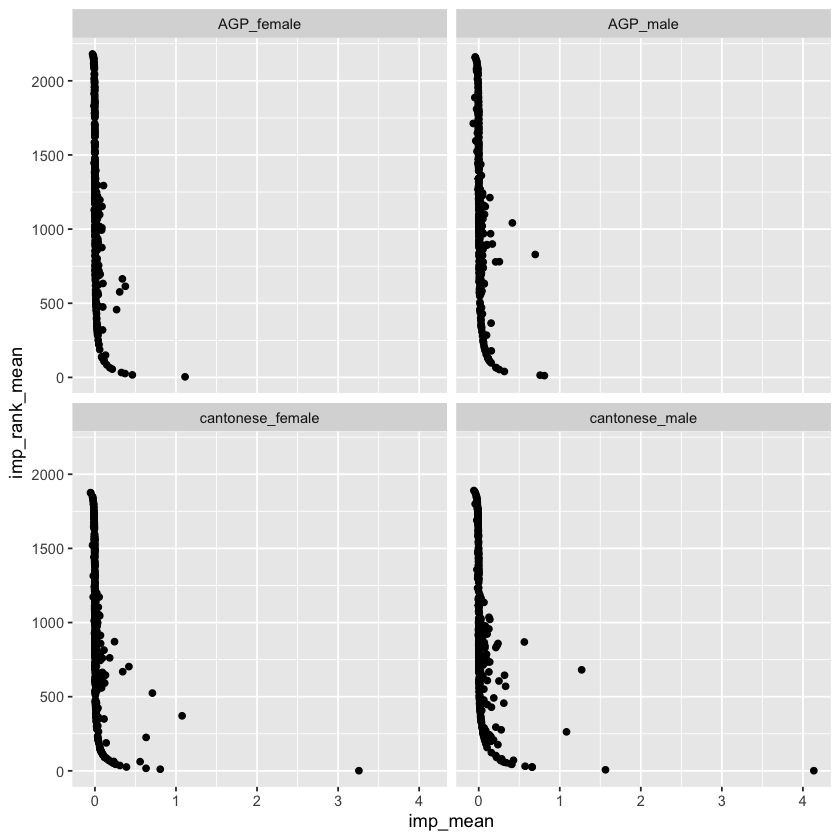

In [19]:
ggplot(Taxon_df, aes(x=imp_mean, y=imp_rank_mean))+geom_point()+facet_wrap(~Dataset)

In [20]:
f_ann_m$Taxon<-factor(f_ann_m$Taxon,levels=Taxon_asc_levels, ordered=TRUE)
summary(f_ann_m$Taxon)

k__Bacteria; p__Firmicutes; c__Clostridia; o__Clostridiales; f__Ruminococcaceae; g__; s__ 
                                                                                                                                848 
                                                         k__Bacteria; p__Firmicutes; c__Clostridia; o__Clostridiales; f__; g__; s__ 
                                                                                                                                460 
                                                    k__Bacteria; p__Firmicutes; c__Clostridia; o__Clostridiales; f__Lachnospiraceae 
                                                                                                                                424 
                              k__Bacteria; p__Firmicutes; c__Clostridia; o__Clostridiales; f__Ruminococcaceae; g__Oscillospira; s__ 
                                                                                                                                424 
                                                    k__Bacteria; p__Firmicutes; c__Clostridia; o__Clostridiales; f__Ruminococcaceae 
                                                                                                                                420 
                                                                        k__Bacteria; p__Firmicutes; c__Clostridia; o__Clostridiales 
                                                                                                                                348 
                                                                 k__Bacteria; p__Tenericutes; c__Mollicutes; o__RF39; f__; g__; s__ 
                                                                                                                                332 
                              k__Bacteria; p__Firmicutes; c__Clostridia; o__Clostridiales; f__Ruminococcaceae; g__Ruminococcus; s__ 
                                                                                                                                316 
                                      k__Bacteria; p__Firmicutes; c__Clostridia; o__Clostridiales; f__Christensenellaceae; g__; s__ 
                                                                                                                                196 
                                       k__Bacteria; p__Firmicutes; c__Clostridia; o__Clostridiales; f__[Mogibacteriaceae]; g__; s__ 
                                                                                                                                192 
                                                k__Bacteria; p__Bacteroidetes; c__Bacteroidia; o__Bacteroidales; f__S24-7; g__; s__ 
                                                                                                                                176 
                               k__Bacteria; p__Firmicutes; c__Clostridia; o__Clostridiales; f__Lachnospiraceae; g__Coprococcus; s__ 
                                                                                                                                120 
                             k__Bacteria; p__Bacteroidetes; c__Bacteroidia; o__Bacteroidales; f__Prevotellaceae; g__Prevotella; s__ 
                                                                                                                                100 
                                                                                                                        k__Bacteria 
                                                                                                                                 92 
                             k__Bacteria; p__Actinobacteria; c__Coriobacteriia; o__Coriobacteriales; f__Coriobacteriaceae; g__; s__ 
                                                                                                                                 92 
                                        k__Bacteria;

In [21]:
f_ann_m[grep("g__Mycoplasma; s__haemominutum", f_ann_m$Taxon), ]

Warning message:
“Factor `Dataset` contains implicit NA, consider using `forcats::fct_explicit_na`”

feature Taxon kingdom phylum class order family genus species Confidence
     Dataset imp imp_rank

In [22]:
Taxon_df[grep("g__Mycoplasma; s__haemominutum", Taxon_df$Taxon), ]

Warning message:
“Factor `Taxon` contains implicit NA, consider using `forcats::fct_explicit_na`”

Taxon Dataset n n_NA n_neg n_pos imp_sum imp_mean imp_rank_sum
     imp_rank_mean imp_rank_min

Warning message:
“Removed 862 rows containing missing values (position_stack).”Warning message:
“Removed 862 rows containing missing values (position_stack).”

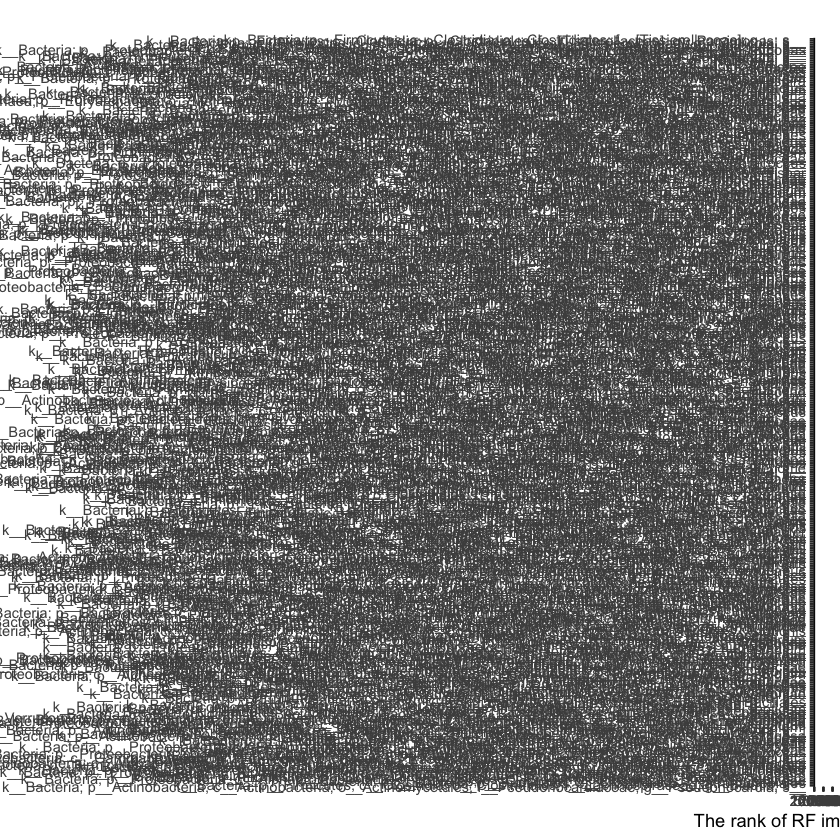

In [23]:
p<-ggplot(f_ann_m, aes(x=Taxon, y=imp_rank, fill=phylum)) + 
  geom_bar(stat="identity", alpha=.5) + ylab("The rank of RF importance score")+
  coord_flip()+ # if want to filp coordinate 
  theme_bw()+
  facet_wrap(~ Dataset, nrow=1)+
  theme(axis.line = element_line(color="black"),
        strip.background = element_rect(colour = "white"), 
        panel.border = element_blank())
p
ggsave(filename=paste(outpath,"/Imp_ranks.cross-datasets_barplot.pdf",sep=""),plot=p, limitsize=FALSE, width=30, height=45)


## heatmap of imp rank across datasets

In [24]:
head(f_ann_m)

feature                                                                                             
1 AACATAGGGGGCAAGCGTTGTCCGGAATCACTGGGCGTAAAGGGCGCGCAGGCGGTCTGTTAAGTCAGATGTGAAAGGTTAGGGCTCAACCCTGAACGTG
2 AACATAGGGGGCAAGCGTTGTCCGGAATCACTGGGCGTAAAGGGCGCGTAGGCGGTCTGTTAAGTCGGATGTGAAATGTAAGGGCTCAACCCTTAACGTG
3 AACATAGGGGGCAAGCGTTGTCCGGAATCACTGGGCGTAAAGGGCGCGTAGGTGGTCTGTTAAGTCAGATGTGAAATGTAAGGGCTCAACCCTTAACGTG
4 AACATAGGGGGCAAGCGTTGTCCGGAATCACTGGGCGTAAAGGGCGCGTAGGTGGTTTGTTAAGTCAGATGTGAAATGTAGGGGCTCAACCCCTAACGTG
5 AACGTAGGGTGCAAGCGTTGTCCGGAATTACTGGGTGTAAAGGGAGCGCAGGCGGACCGGCAAGTTGGAAGTGAAAACCACGGGCTCAACCCGTGAATTG
6 AACGTAGGGTGCAAGCGTTGTCCGGAATTACTGGGTGTAAAGGGAGCGCAGGCGGACCGGCAAGTTGGAAGTGAAAACCATAGGCTCAACCTATGGATTG
  Taxon                                                                                              
1 k__Bacteria; p__Firmicutes; c__Clostridia; o__Clostridiales; f__Peptococcaceae; g__Peptococcus; s__
2 k__Bacteria; p__Firmicutes; c__Clostridia; o__Clostridiales; f__Peptococcaceae; g__Peptococcus; s__
3 k__Bacteria; p__Firmicutes; c__Clostridia; o__Clostridiales; f__Peptococcaceae; g__Peptococcus; s__
4 k__Bacteria; p__Firmicutes; c__Clostridia; o__Clostridiales; f__Peptococcaceae; g__Peptococcus; s__
5 k__Bacteria; p__Firmicutes; c__Clostridia; o__Clostridiales; f__Ruminococcaceae                    
6 k__Bacteria; p__Firmicutes; c__Clostridia; o__Clostridiales; f__Ruminococcaceae                    
  kingdom     phylum         class          order            
1 k__Bacteria  p__Firmicutes  c__Clostridia  o__Clostridiales
2 k__Bacteria  p__Firmicutes  c__Clostridia  o__Clostridiales
3 k__Bacteria  p__Firmicutes  c__Clostridia  o__Clostridiales
4 k__Bacteria  p__Firmicutes  c__Clostridia  o__Clostridiales
5 k__Bacteria  p__Firmicutes  c__Clostridia  o__Clostridiales
6 k__Bacteria  p__Firmicutes  c__Clostridia  o__Clostridiales
  family              genus           species Confidence Dataset   
1  f__Peptococcaceae   g__Peptococcus  s__    0.9999978  AGP_female
2  f__Peptococcaceae   g__Peptococcus  s__    0.9999999  AGP_female
3  f__Peptococcaceae   g__Peptococcus  s__    0.9999997  AGP_female
4  f__Peptococcaceae   g__Peptococcus  s__    0.9999956  AGP_female
5  f__Ruminococcaceae NA              NA      0.9999966  AGP_female
6  f__Ruminococcaceae NA              NA      0.9999977  AGP_female
  imp          imp_rank
1  0.004527079  740    
2 -0.001090662 1698    
3 -0.001775111 1785    
4 -0.002258264 1836    
5  0.027347287  330    
6  0.017894740  426

In [25]:
p<-ggplot(f_ann_m, aes(Dataset, Taxon) ) +
  geom_tile(data=f_ann_m, na.rm = FALSE, aes(fill = imp_rank), colour = 'black') + # adding "-" can switch the coloring
  #scale_y_discrete(label=f_ann_m$Taxon[ord])+
  #scale_fill_continuous(type = "viridis", na.value = 'salmon')+
  #coord_flip()+
  theme(axis.text.x=element_text(angle=90,hjust=1))+
  scale_fill_gradient2(high ="#f46d43", mid="white", low= "steelblue", na.value = NA)
p
ggsave(filename=paste(outpath,"/Imp_ranks_VS_dataset_heatmap.ggplot.pdf",sep=""),plot=p, width=20, height=40)


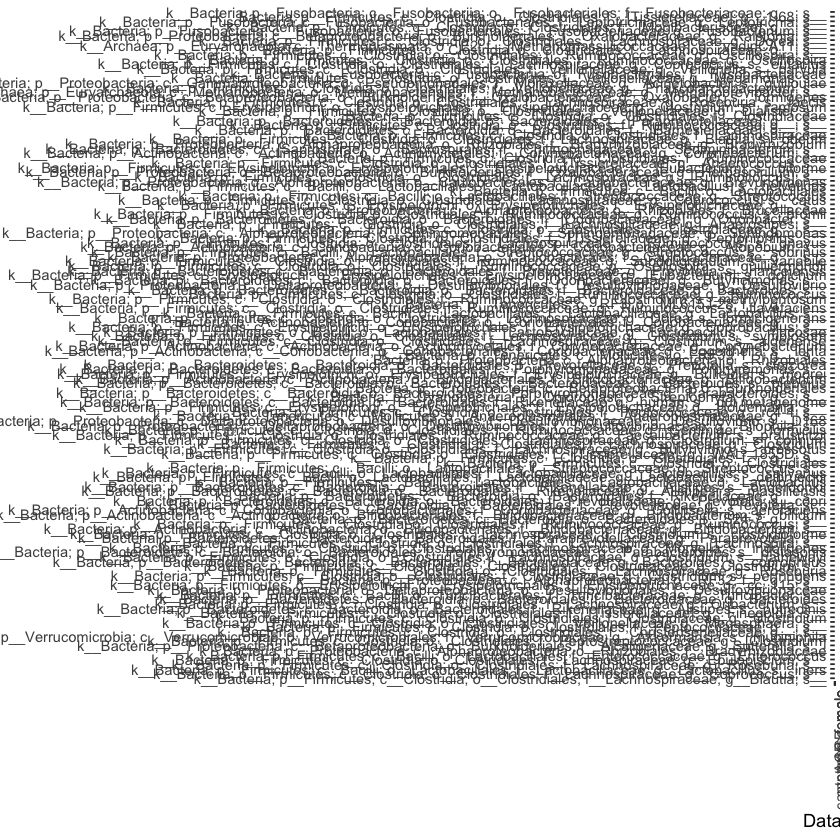

In [26]:
f_ann_m_top128<-subset(f_ann_m, imp_rank<128)
p<-ggplot(f_ann_m_top128, aes(Dataset, Taxon) ) +
  geom_tile(data=f_ann_m_top128, na.rm = FALSE, aes(fill = imp_rank), colour = 'black') + # adding "-" can switch the coloring
  geom_text(aes(label = round(imp_rank, 1))) +
    #scale_y_discrete(label=f_ann_m$Taxon[ord])+
  #scale_fill_continuous(type = "viridis", na.value = 'salmon')+
  #coord_flip()+
  theme(axis.text.x=element_text(angle=90,hjust=1))+
  scale_fill_gradient2(high ="#f46d43", mid="white", low= "steelblue", na.value = NA)
p
ggsave(filename=paste(outpath,"/Top128_Imp_ranks_VS_dataset_heatmap.ggplot.pdf",sep=""),plot=p, width=15, height=15)


In [27]:
f_ann_m_top128[grep("g__Mycoplasma; s__haemominutum", f_ann_m_top128$Taxon), ]

Warning message:
“Factor `Dataset` contains implicit NA, consider using `forcats::fct_explicit_na`”

feature Taxon kingdom phylum class order family genus species Confidence
     Dataset imp imp_rank

In [28]:
Taxon_df_top512<-subset(Taxon_df, imp_rank_mean<512)
Taxon_df_top512_acast<-acast(Taxon_df_top512, Taxon~Dataset, value.var="imp_rank_mean")
row_sum<-rowSums(Taxon_df_top512_acast, na.rm = T)
row_peudosum4NA<-rowMeans(Taxon_df_top512_acast, na.rm = T)*apply(Taxon_df_top512_acast, 1, function(x) sum(is.na(x)))
row_sum_comb<-row_sum+row_peudosum4NA
ord<-order(row_sum_comb, decreasing = F)
Taxon_df_top512$Taxon<-factor(Taxon_df_top512$Taxon,levels=rownames(Taxon_df_top512_acast)[ord], ordered=TRUE)

Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.


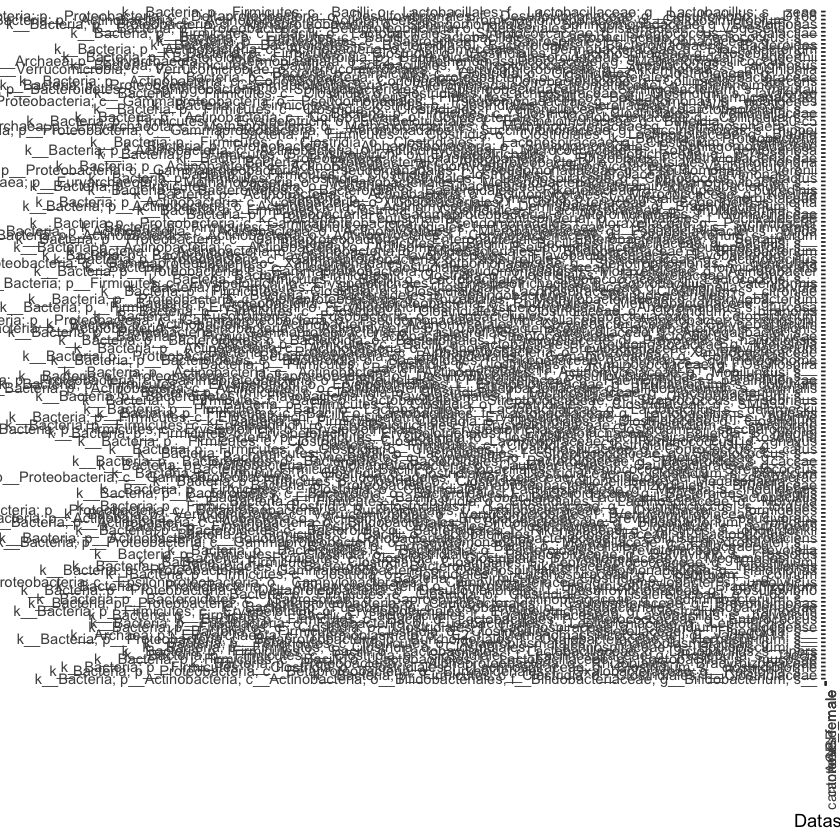

In [29]:
p<-ggplot(Taxon_df_top512, aes(Dataset, Taxon) ) +
  geom_tile(data=Taxon_df_top512, na.rm = FALSE, aes(fill = imp_rank_mean), colour = 'black') + # adding "-" can switch the coloring
  geom_text(aes(label = round(imp_rank_mean, 1))) +
    #scale_y_discrete(label=f_ann_m$Taxon[ord])+
  scale_fill_continuous(type = "viridis", na.value = 'white')+
  #coord_flip()+
  theme(axis.text.x=element_text(angle=90,hjust=1))+
  scale_fill_gradient2(high ="#f46d43", mid="white", low= "steelblue", na.value = NA)
p
ggsave(filename=paste(outpath,"/Top512_mean_imp_rank_by_Taxon_VS_dataset_heatmap.ggplot.pdf",sep=""),plot=p, width=15, height=40)


In [30]:
Taxon_df_top512<-subset(Taxon_df, imp_rank_min<512)
Taxon_df_top512_acast<-acast(Taxon_df_top512, Taxon~Dataset, value.var="imp_rank_min")
row_sum<-rowSums(Taxon_df_top512_acast, na.rm = T)
row_peudosum4NA<-rowMeans(Taxon_df_top512_acast, na.rm = T)*apply(Taxon_df_top512_acast, 1, function(x) sum(is.na(x)))
row_sum_comb<-row_sum+row_peudosum4NA
ord<-order(row_sum_comb, decreasing = F)
Taxon_df_top512$Taxon<-factor(Taxon_df_top512$Taxon,levels=rownames(Taxon_df_top512_acast)[ord], ordered=TRUE)


In [31]:

p<-ggplot(Taxon_df_top512, aes(Dataset, Taxon) ) +
  geom_tile(data=Taxon_df_top512, na.rm = FALSE, aes(fill = imp_rank_min), colour = 'black') + # adding "-" can switch the coloring
  geom_text(aes(label = round(imp_rank_min, 1))) +
  #scale_y_discrete(label=f_ann_m$Taxon[ord])+
  scale_fill_continuous(type = "viridis", na.value = 'white')+
  #coord_flip()+
  theme(axis.text.x=element_text(angle=90,hjust=1))+
  scale_fill_gradient2(high ="#f46d43", mid="white", low= "steelblue", na.value = NA)
p
ggsave(filename=paste(outpath,"/Top512_min_imp_rank_by_Taxon_VS_dataset_heatmap.ggplot.pdf",sep=""),plot=p, width=15, height=40)


Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.


In [32]:
Taxon_df_top128<-subset(Taxon_df, imp_rank_min<128)
Taxon_df_top128_acast<-acast(Taxon_df_top128, Taxon~Dataset, value.var="imp_rank_min")
row_sum<-rowSums(Taxon_df_top128_acast, na.rm = T)
row_peudosum4NA<-rowMeans(Taxon_df_top128_acast, na.rm = T)*apply(Taxon_df_top128_acast, 1, function(x) sum(is.na(x)))
row_sum_comb<-row_sum+row_peudosum4NA
ord<-order(row_sum_comb, decreasing = F)
Taxon_df_top128$Taxon<-factor(Taxon_df_top128$Taxon,levels=rownames(Taxon_df_top128_acast)[ord], ordered=TRUE)


Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.


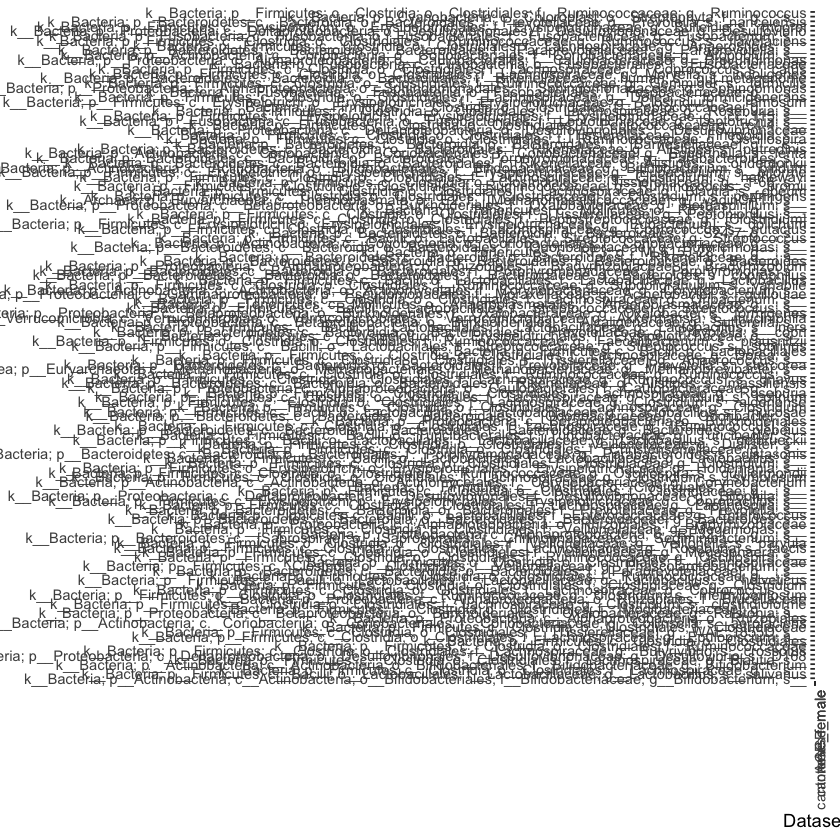

In [33]:

p<-ggplot(Taxon_df_top128, aes(Dataset, Taxon) ) +
  geom_tile(data=Taxon_df_top128, na.rm = FALSE, aes(fill = imp_rank_min), colour = 'black') + # adding "-" can switch the coloring
  geom_text(aes(label = round(imp_rank_min, 1))) +
  #scale_y_discrete(label=f_ann_m$Taxon)+
  scale_fill_continuous(type = "viridis", na.value = 'white')+
  #coord_flip()+
  theme(axis.text.x=element_text(angle=90,hjust=1))+
  scale_fill_gradient2(high ="#f46d43", mid="white", low= "steelblue", na.value = NA)
p
ggsave(filename=paste(outpath,"/Top128_min_imp_rank_by_Taxon_VS_dataset_heatmap.ggplot.pdf",sep=""),plot=p, width=15, height=30)


In [34]:
Taxon_df_top64<-subset(Taxon_df, imp_rank_min<64)
Taxon_df_top64_acast<-acast(Taxon_df_top64, Taxon~Dataset, value.var="imp_rank_min")
row_sum<-rowSums(Taxon_df_top64_acast, na.rm = T)
NA_perc<-rowSums(is.na(Taxon_df_top64_acast))/ncol(Taxon_df_top64_acast)
NA_perc_idx<-which(NA_perc<=0.5); taxa_kept<-names(NA_perc)[NA_perc_idx]
row_peudosum4NA<-rowMeans(Taxon_df_top64_acast, na.rm = T)*apply(Taxon_df_top64_acast, 1, function(x) sum(is.na(x)))
row_sum_comb<-row_sum+row_peudosum4NA
ord<-order(row_sum_comb, decreasing = F)
Taxon_df_top64$Taxon<-factor(Taxon_df_top64$Taxon,levels=rownames(Taxon_df_top64_acast)[ord], ordered=TRUE)


Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.


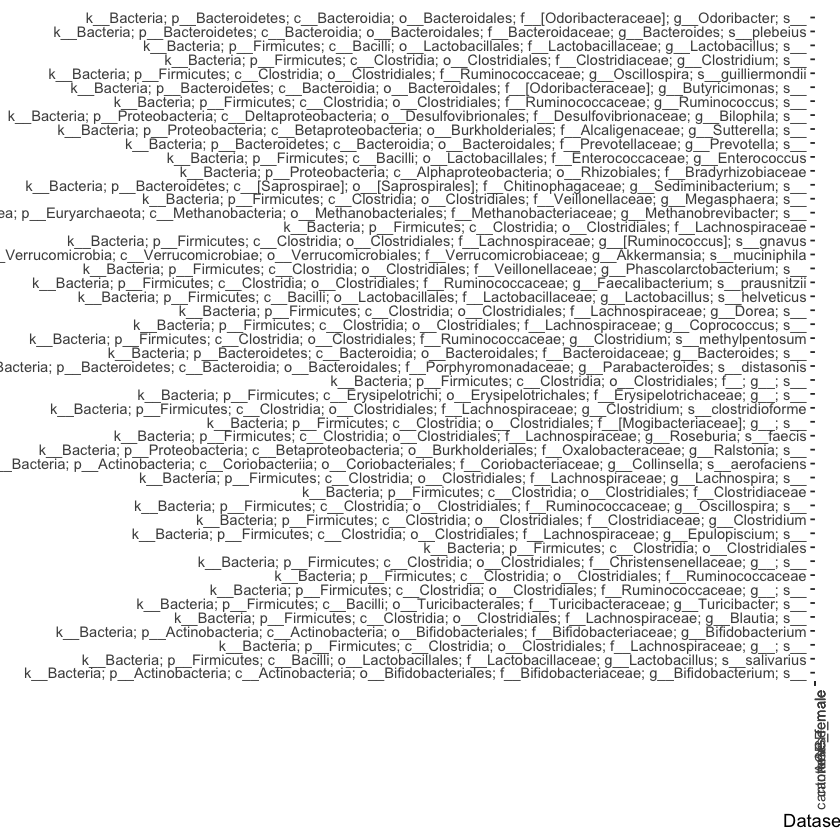

In [35]:
p<-ggplot(subset(Taxon_df_top64, Taxon %in% taxa_kept), aes(Dataset, Taxon) ) +
  geom_tile(data=subset(Taxon_df_top64, Taxon %in% taxa_kept), na.rm = FALSE, aes(fill = imp_rank_min), colour = 'black') + # adding "-" can switch the coloring
  geom_text(aes(label = round(imp_rank_min, 1))) +
  #scale_y_discrete(label=f_ann_m$Taxon)+
  scale_fill_continuous(type = "viridis", na.value = 'white')+
  #coord_flip()+
  theme(axis.text.x=element_text(angle=90,hjust=1))+
  scale_fill_gradient2(high ="#f46d43", mid="white", low= "steelblue", na.value = NA)
p
ggsave(filename=paste(outpath,"/Top64_min_imp_rank_by_Taxon_VS_dataset_heatmap.ggplot.pdf",sep=""),plot=p, width=15, height=10)


In [36]:
f_ann_m_top64<-subset(f_ann_m, imp_rank<=64)
f_ann_m_top64_acast<-acast(f_ann_m_top64, feature~Dataset, value.var="imp_rank")
row_sum<-rowSums(f_ann_m_top64_acast, na.rm = T) # rank rowSums
NA_perc<-rowSums(is.na(f_ann_m_top64_acast))/ncol(f_ann_m_top64_acast)
NA_perc_idx<-which(NA_perc<=0.5); feature_kept<-names(NA_perc)[NA_perc_idx] # only keep the features showed up in at least 50% of datasets
row_peudosum4NA<-rowMeans(f_ann_m_top64_acast, na.rm = T)*apply(f_ann_m_top64_acast, 1, function(x) sum(is.na(x)))
row_sum_comb<-row_sum + row_peudosum4NA
#print(row_sum_comb)                                                                
ord<-order(row_sum_comb, decreasing = F)
f_ann_m_top64$feature<-factor(f_ann_m_top64$feature,levels=rownames(f_ann_m_top64_acast)[ord], ordered=TRUE)
#f_ann_m_top64$Taxon<-factor(f_ann_m_top64$Taxon,levels=rownames(f_ann_m_top64_acast)[ord], ordered=TRUE)


In [43]:
getwd()

[1] "/Users/huangshi/MyProjects/CMI-IBM/age-prediction_copy/gut_4575_by_cohort_sex_RF.reg_out"

In [44]:
feature_metadata<-"../../Datasets/gut_data/gut_taxonomy.txt"
fmetadata<-read.table(feature_metadata,header=T,sep="\t")

In [45]:
add_ann<-function(tab, fmetadata, tab_id_col=1, fmetadata_id_col=1){
  fmetadata_matched<-fmetadata[which(fmetadata[, fmetadata_id_col] %in% tab[, tab_id_col]),]
  out<-merge(tab, fmetadata_matched, by.x=tab_id_col, by.y=fmetadata_id_col)
  out
}

In [46]:
dim(f_ann_m_top64_acast)
length(row_sum)
length(row_sum_comb)
length(f_ann_m_top64$feature)
length(unique(f_ann_m_top64$feature))
length(f_ann_m_top64$Taxon)
length(unique(f_ann_m_top64$Taxon))

[1] 185   4

[1] 185

[1] 185

[1] 256

[1] 185

[1] 256

[1] 95

In [47]:
ord

[1] 105 142 106 157  60  81 116  38 132 172 140   1 115 124  24  32  46  47
 [19] 159 160  54  68 137 166  15 128  89 147 167  53  37 135  58 168  39 171
 [37] 136  42 146 174  95  90  97  11 102 118 180 104 182  80 178  52  64 163
 [55] 100 161  61 107  26 175 179  12  20  49  87  98 148  14  43  34  69 152
 [73] 173   2   3  16  83  88   7  63  23  56  96   5  55  57 141 125  10  66
 [91]  70  73  48 130 139 134   8  33  74 121 133   9  25  86 155  31  65  99
[109] 108 158 185  50 170 169  71  77 109 143 144 127 138 162 113  91  94 156
[127]  59  78  27 120 153  67  84 117 131  17  28  36 154 110 150  35  45  29
[145]  41 122 129  72 123  19  21 183  79 101 177  30  40 181   4  75 114 119
[163]  22 149   6  85 103  13  18  82 164  44  76  93  62  92 111 112 126 145
[181] 165 184  51 151 176

In [48]:
p<-ggplot(f_ann_m_top64, aes(Dataset, Taxon) ) +
  geom_tile(data=f_ann_m_top64, na.rm = FALSE, aes(fill = imp_rank), colour = 'black') + # adding "-" can switch the coloring
  geom_text(aes(label = round(imp_rank, 1))) +
  #scale_y_discrete(label=f_ann_m_top64$Taxon)+
  scale_fill_continuous(type = "viridis", na.value = 'white')+
  #coord_flip()+
  theme(axis.text.x=element_text(angle=90,hjust=1))+
  scale_fill_gradient2(high ="#f46d43", mid="white", low= "steelblue", na.value = NA)
p
ggsave(filename=paste(outpath,"/Top64_imp_rank_VS_dataset_heatmap.ggplot.pdf",sep=""),plot=p, width=15, height=25)


Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.


In [52]:
sessionInfo()

R version 3.5.1 (2018-07-02)
Platform: x86_64-apple-darwin13.4.0 (64-bit)
Running under: macOS  10.14.5

Matrix products: default
BLAS/LAPACK: /Users/huangshi/anaconda3/envs/r-env/lib/R/lib/libRblas.dylib

locale:
[1] en_US.UTF-8/en_US.UTF-8/en_US.UTF-8/C/en_US.UTF-8/en_US.UTF-8

attached base packages:
[1] parallel  stats     graphics  grDevices utils     datasets  methods  
[8] base     

other attached packages:
 [1] dplyr_0.8.1         UpSetR_1.4.0        pROC_1.13.0        
 [4] cowplot_0.9.4       doMC_1.3.5          iterators_1.0.10   
 [7] foreach_1.4.4       biomformat_1.10.0   vegan_2.5-4        
[10] lattice_0.20-35     permute_0.9-4       gridExtra_2.3      
[13] randomForest_4.6-14 combinat_0.0-8      pheatmap_1.0.12    
[16] ggplot2_3.0.0       reshape2_1.4.3     

loaded via a namespace (and not attached):
 [1] pbdZMQ_0.3-3       tidyselect_0.2.5   repr_0.15.0        purrr_0.2.5       
 [5] rhdf5_2.26.2       colorspace_1.3-2   viridisLite_0.3.0  htmltools_0.3.6   
 [9] 